# Example usage of Statistical Clear Sky Fitting (SCSF)

This notebook shows the basic usage of the SCSF algorithm and code. The source of the data is [NREL's PVDAQ service](https://developer.nrel.gov/docs/solar/pvdaq-v3/). `solardatatools` is a dependency for Statistical Clear Sky, and additional tools are utilized here to prepaire the data for analysis.

### Imports

In [1]:
from sys import path
path.append('..')
from statistical_clear_sky import IterativeFitting
from solardatatools import get_pvdaq_data, standardize_time_axis, fix_time_shifts, make_2d, plot_2d

### Grab a data set from PVDAQ

The `get_pvdaq_data` function is provided by `solardatatools` as an API wrapper for PVDAQ.

In [2]:
df = get_pvdaq_data(sysid=35, api_key='DEMO_KEY', year=[2011, 2012, 2013])

### Process the data into a clean matrix for analysis

In [3]:
data_matrix = fix_time_shifts(make_2d(standardize_time_axis(df), key='ac_power'), verbose=True)

No time shifts found


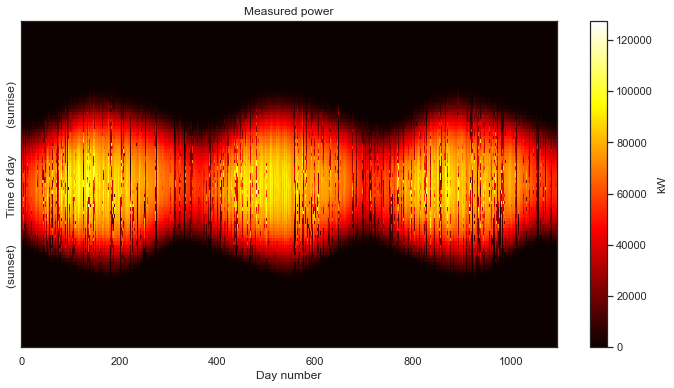

In [4]:
plot_2d(data_matrix);

### Setup and execute the SCSF algorithm using all default values

In [5]:
scsf = IterativeFitting(data_matrix)

In [6]:
scsf.execute()

obtaining initial value of component r0
obtaining weights
starting at 6449918682.183 [17155840.52783386, 515.7029253237151, 4873497566.531168, 1559264759.4213653]
Miminizing left L matrix
Miminizing right R matrix
iteration 1: 18058396.935 [1.63914999e+07 3.91785000e+02 1.66650514e+06 1.39000000e-01]
Miminizing left L matrix
Miminizing right R matrix
iteration 2: 14880834.996 [1.32600636e+07 1.88408800e+03 1.61888729e+06 5.50000000e-02]
Miminizing left L matrix
Miminizing right R matrix
iteration 3: 14701199.314 [1.30812833e+07 1.49743300e+03 1.61841847e+06 1.59000000e-01]
Miminizing left L matrix
Miminizing right R matrix
iteration 4: 14672449.716 [1.30541747e+07 1.52036100e+03 1.61675453e+06 1.60000000e-01]
Miminizing left L matrix
Miminizing right R matrix
iteration 5: 14661746.831 [1.30454533e+07 1.64602100e+03 1.61464733e+06 2.19000000e-01]
Minimization complete in 0.69 minutes


### Inspect the results of the SCSF procedure

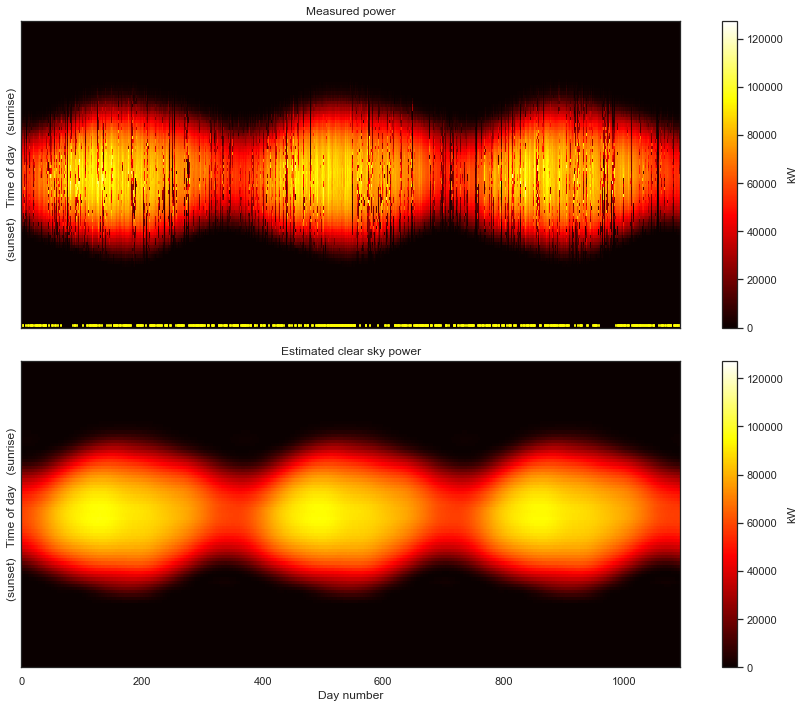

In [7]:
scsf.plot_measured_clear(show_days=True);

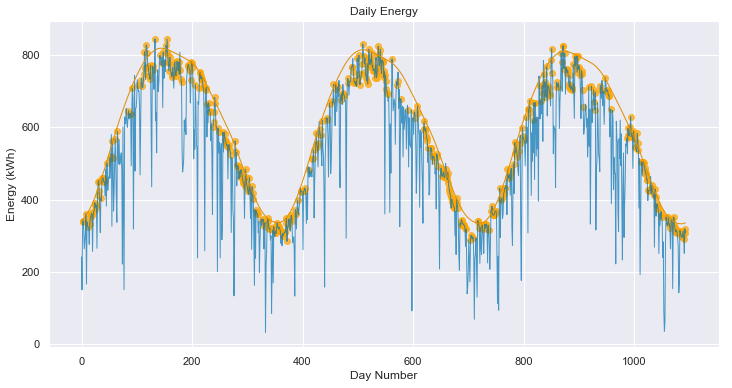

In [8]:
scsf.plot_energy(show_clear=True, show_days=True, scale_power=True)
plt.title('Daily Energy')
plt.xlabel('Day Number')
plt.ylabel('Energy (kWh)');

In [9]:
print('Estimated degradation: {:.2f}% per year'.format(scsf.beta_value.item() * 100))

Estimated degradation: -0.52% per year


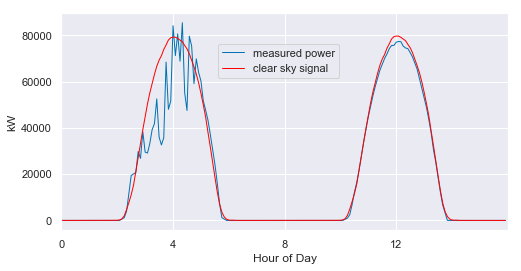

In [10]:
scsf.ts_plot(start_day=50)